## COMP47670 Assignment 1: Data Collection & Preparation


### Written by : Lang Lin  18204365   &   Jing Liu  18202321


## Introduction of our study 
In this study, we choose World Bank APIs as the data source and collected data related to the topic of Life Expectancy of people among the world. The dimension of this data is at national level and we selected data in 2015 as target dataset. Several indicators will be examined and Multiple Regression model is our theory framework. Based on the collected data, via Python implementing all the data analytics, we will find that life expectancy is influenced by different selected determinants and they make contributions at diverse levels.

####  Research Question
The primary goal of this study is to analyze what factors in our daily life can impact people’s life expectancy. After carefully reading the data of Word Bank (2015) and from the experience of previous research, we selected life expectancy as the research target and other five potential indexes as the independent variables from the dataset, and tried to introduce them into building models.

According to the requirements, we will complete the assignment within following 6 steps: Firstly, we will identify avaliable web API. Then,Python will be used to collect the relevant data. After parsing the collected data, and storing them in an appropriate file format, we will apply any pre-processing steps to clean/filter/combine the data. Finally, we will draw a conclusion and take some disscusion after creating linear regression not only for one-dimensional linear regression but also in mutiple regression, in order to analysis to what extends the factors influcing life expectancy. 

## 1 Identify web API
### 1.1 Import necessary packages

In [44]:
# import some necessary packages for this task
import requests
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline


### 1.2 API Chosen
A single API chosen for this assignment was provided by https://data.worldbank.org/  
Specifically,the WorldBank data API- https://api.worldbank.org/v2/indicator  
We can get free and public data from the API without any key.  

In [45]:
# pandas and seaborn options setting
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 20)
sns.set()

## 2 Collect data from chosen API  
### 2.1 Raw Data Collecting

From the API Basic Call Structures: https://datahelpdesk.worldbank.org/knowledgebase/articles/898581   
, we can get data for iso2code of the every country, and then get the raw data by using it as a params of the URL  

In [46]:
# create a list to store "iso2code",which is the index of the data
country_li = []
# the url of World Bank API
country_url = "https://api.worldbank.org/V2/country/?per_page=310&format=json"
# crawl data by using web packages: requests
response = requests.get(country_url).json()
# storing data into the list 
for i in response[1]:
    country_li.append(i['iso2Code'].lower())

There are thousands of indicators of the original data，but we just downloaded those we need to analyze.In this task, six indexes are selected: Life expectancy at birth(years),Population ages 65 and above, Domestic general government health expenditure, Lifetime risk of maternal death, Adjusted net national income per capita (current US$) and Merchandise trade.Life expectancy is the dependent varible and the others will be the independent varibles in our model.

After raw data collecting and parsing, we can append the choose iso2code with parameter form specified by API: all_country_string

In [47]:
# combining all choosen iso2code as strings
# Request parameters for the World Bank API to get the corresponding response
all_country_string = ';'.join(country_li)

# create a dictionary to store the selected indexes and explainations of them
# keys of d_items as API's param, values[0] as dataframe index, and values[1] as param's detail message
d_items = {
    'SH.XPD.GHED.GE.ZS': ['healthex_per_gov' ,'Domestic general government health expenditure(% of general government expenditure)'],
    'SP.POP.65UP.TO.ZS': ['age_dependency', 'Population ages 65 and above (% of total)'],
    'TG.VAL.TOTL.GD.ZS': ['trade_per_gdp', 'Merchandise trade (% of GDP)'],
    'NY.ADJ.NNTY.PC.CD': ['pcgni_current_dollar', 'Adjusted net national income per capita (current US$)'],
    'SH.MMR.RISK.ZS': ['mater_death_risk', 'Lifetime risk of maternal death (%)'],
    'SP.DYN.LE00.IN': ['lifeexp_total', 'Life expectancy at birth, total (years)']
}

#### Dependent Variable
The dependent variable in this study is people’s life expectancy at birth (hereafter is “lifeexp_total”) among 264 countries in 2015.
#### Independent Variables
Five categories of independent variables are introduced in this experiment: (1) the Domestic general government health expenditure(hereafter is “healthex_per_gov”); (2) Population ages 65 and above(hereafter is “age_dependency”); (3) Merchandise trade (hereafter is “trade_per_gdp”); (4)Adjusted net national income per capita(hereafter is “pcgni_current_dollar”) and (5) Lifetime risk of maternal death(hereafter is “mater_death_risk”).

Going throught all d_items's keys and request the API to get the corresponding data and add it to d for subsequent pandas loading data

In [48]:
# create anther dictinary to keep the raw data
d = {}
for j in d_items.keys():
    url = "https://api.worldbank.org/v2/country/{}/indicator/{}?date=2015&format=json&per_page=310".format(all_country_string, j)
    response = requests.get(url).json()
    for k in response[1]:
        d.setdefault(k['country']['value'], []).append(k['value'])

In [49]:
# Transform raw data into pandas Data Frames
# setting index
df = pd.DataFrame(d, index=[d_items['SH.XPD.GHED.GE.ZS'][0], d_items['SP.POP.65UP.TO.ZS'][0], d_items['TG.VAL.TOTL.GD.ZS'][0], 
                            d_items['NY.ADJ.NNTY.PC.CD'][0], d_items['SH.MMR.RISK.ZS'][0], d_items['SP.DYN.LE00.IN'][0]])

# type: object -> np.float64
# convert to a np.float64 to allow for numerical analysis
df = df.T.astype(np.float64)

### 2.2 Raw Data Overview
In this part, we will do basic statistics of the raw dataset,including: getting general information and the summary statistics ;checking dataset's shape,size and missing data rate.

In [50]:
# get the tail data
df.tail()

,healthex_per_gov,age_dependency,trade_per_gdp,pcgni_current_dollar,mater_death_risk,lifeexp_total
Kosovo,NaN,NaN,NaN,NaN,NaN,71.346341
"Yemen, Rep.",2.228722,2.857026,16.609797,1283.401687,1.658729,64.743000
South Africa,14.058134,5.081240,58.601299,4687.381253,0.333630,61.981000
Zambia,6.792697,2.502095,73.357411,998.994774,1.258249,61.397000
Zimbabwe,8.149990,2.823593,36.308421,755.784964,1.938964,60.398000


In [51]:
# check the shape of the dataset
df.shape

(264, 6)

In [52]:
# check the size of the dataset
df.size

1584

In [53]:
# get a basic summary of the values in a Data Frame
df.describe()

,healthex_per_gov,age_dependency,trade_per_gdp,pcgni_current_dollar,mater_death_risk,lifeexp_total
count,203.000000,239.000000,235.000000,215.000000,229.000000,244.000000
mean,10.265371,8.296095,60.652958,9777.286109,0.766428,71.746222
std,4.960601,5.695925,36.473617,13274.822619,1.194006,7.643339
min,1.223006,1.021858,11.775096,217.507403,0.004222,51.410000
25%,6.614127,3.557682,39.648680,1365.119137,0.029653,66.482000
50%,9.976395,6.257527,51.098380,4126.072901,0.171974,73.208500
75%,12.745872,12.684757,73.651764,10549.031492,0.984470,77.043000
max,25.162400,26.015365,345.856376,66815.688498,5.937824,84.278049


In [54]:
# get dataframe details 
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264 entries, Aruba to Zimbabwe
Data columns (total 6 columns):
healthex_per_gov        203 non-null float64
age_dependency          239 non-null float64
trade_per_gdp           235 non-null float64
pcgni_current_dollar    215 non-null float64
mater_death_risk        229 non-null float64
lifeexp_total           244 non-null float64
dtypes: float64(6)
memory usage: 14.4+ KB


In [55]:
# check the total number of missing data for each index
df.isnull().sum()

healthex_per_gov        61
age_dependency          25
trade_per_gdp           29
pcgni_current_dollar    49
mater_death_risk        35
lifeexp_total           20
dtype: int64

In [56]:
# caclulate values' missing rate in this dataset
for column in df.columns:
    print(column ,"value \t\t missing rate: \t\t",round((len(df) - len(df[df[column].notna()])) / len(df), 3) *100, "%")

healthex_per_gov value 		 missing rate: 		 23.1 %
age_dependency value 		 missing rate: 		 9.5 %
trade_per_gdp value 		 missing rate: 		 11.0 %
pcgni_current_dollar value 		 missing rate: 		 18.6 %
mater_death_risk value 		 missing rate: 		 13.3 %
lifeexp_total value 		 missing rate: 		 7.6 %


## 3 Parse the collected data, and store them in an appropriate file format 
### 3.1 Creating CSV file 
During this step, raw data will be written into CSV file after cleaning.  
The following code retreives the raw data using the above Functions from the API and writes it to a CSV file.  
This data needs extensive cleaning and manipulation before it can be used.

In [57]:
# Previewing the data of selected variables
# clean data where values are None and duplicates
# and save the file to the disk
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)
df.to_csv("WorldBank-data.csv")

## 4 Apply any pre-processing steps to clean/filter/combine the data  

### 4.1 Data Representation
Pandas Data Frame format is an commonly used and appropriate data stucture to represent dataset.

In [58]:
# show the full dataframe after cleaning
df

,healthex_per_gov,age_dependency,trade_per_gdp,pcgni_current_dollar,mater_death_risk,lifeexp_total
Afghanistan,2.014406,2.493140,41.664859,494.301630,1.926131,63.288000
Angola,3.729200,2.306314,46.365415,2062.993440,3.084886,61.241000
Albania,9.508133,12.536704,54.887798,3458.725714,0.053361,78.174000
United Arab Emirates,7.992070,1.021858,157.342876,36198.912352,0.012655,77.101000
Argentina,12.341118,10.926302,19.670305,11728.035063,0.126379,76.415000
Armenia,6.115303,10.909237,44.768510,3173.764425,0.042665,74.445000
Austria,15.097695,18.840484,80.862204,35926.945110,0.005492,81.190244
Azerbaijan,4.127613,5.738112,48.627991,4478.772902,0.062499,71.921000
Burundi,11.773698,2.502483,27.157871,217.507403,4.272948,57.094000
Belgium,16.023747,18.142309,169.668519,32465.900800,0.012566,80.992683


## 5 Analyse and summarise the cleaned dataset¶
### 5.1 Clean data overview 
In this part, we will do basic statistics of the clean dataset,including: getting the summary statistics ;double checking missing data rate.

In [59]:
# get dataframe data description by pandas buildin method
df.describe()

,healthex_per_gov,age_dependency,trade_per_gdp,pcgni_current_dollar,mater_death_risk,lifeexp_total
count,181.000000,181.000000,181.000000,181.000000,181.000000,181.000000
mean,10.298298,8.457363,61.817581,10303.624848,0.706293,71.715445
std,4.938284,5.851003,32.277345,13696.987804,1.194124,7.672478
min,1.223006,1.021858,13.049231,217.507403,0.004222,51.410000
25%,6.792697,3.455671,41.664859,1608.173835,0.028118,66.464000
50%,9.948694,6.465465,52.324469,4480.837361,0.122989,74.182000
75%,12.562865,13.488624,75.021084,11162.286519,0.693444,76.933000
max,25.162400,22.362871,211.571174,66815.688498,5.937824,82.897561


In [60]:
# double check the total number of missing data for each index
df.isnull().sum()

healthex_per_gov        0
age_dependency          0
trade_per_gdp           0
pcgni_current_dollar    0
mater_death_risk        0
lifeexp_total           0
dtype: int64

From the result above, we can confirm this is no null value in this target dataset now.It means all the null values have been successfully tackled.

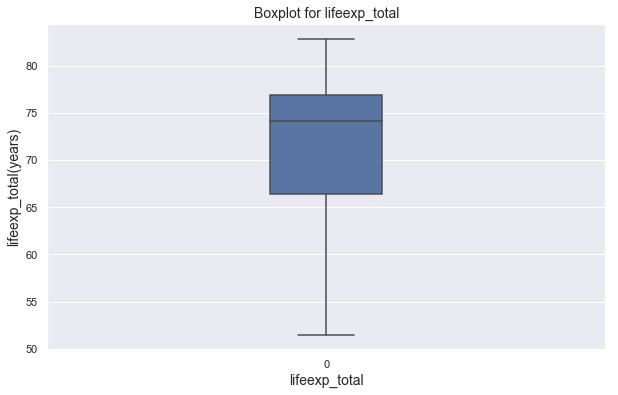

<Figure size 432x288 with 0 Axes>

In [18]:
# Check the data outliers of dependent variable by ploting boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=tuple(df["lifeexp_total"]), width=0.2)
plt.ylabel("lifeexp_total(years)", fontsize = 14)
plt.xlabel("lifeexp_total", fontsize = 14)
plt.title("Boxplot for lifeexp_total", fontsize = 14)
plt.show()
plt.savefig("Boxplot for lifeexp_total")

From the above boxplot, we can see that there is no outliers of life expectancy data. In other words, the existing data of this index is very neat.It is suitable to build models.

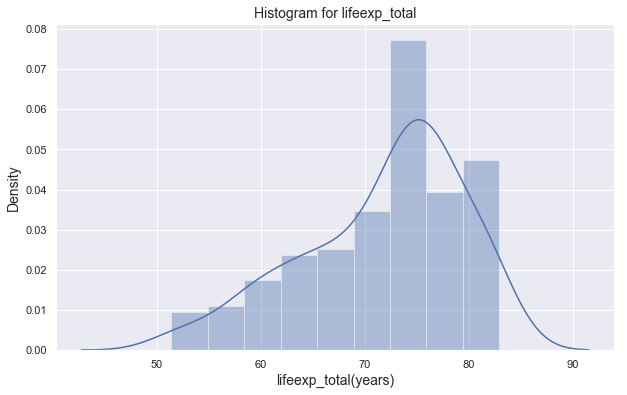

<Figure size 432x288 with 0 Axes>

In [19]:
# Check the data distribution of dependent variable(life expectancy) by histogram
# Checking whether the residuals in line with normal distribution
plt.figure(figsize=(10, 6))
sns.distplot(df["lifeexp_total"])
plt.xlabel("lifeexp_total(years)", fontsize = 14)
plt.title("Histogram for lifeexp_total", fontsize = 14)
plt.ylabel("Density", fontsize = 14)
plt.show()
plt.savefig("Histogram for lifeexp_total")

From the histogram above, we can see the life expectancy index in histogram is not so obviously displaying normal distribution, but it is in line with the normal distribution, which means it satisfies the regression assumptions.

In [63]:
# check correlation between variables by table
df.corr()

,healthex_per_gov,age_dependency,trade_per_gdp,pcgni_current_dollar,mater_death_risk,lifeexp_total
healthex_per_gov,1.000000,0.576537,0.086581,0.582540,-0.435094,0.615766
age_dependency,0.576537,1.000000,0.232950,0.598194,-0.518309,0.720537
trade_per_gdp,0.086581,0.232950,1.000000,0.175456,-0.232841,0.211569
pcgni_current_dollar,0.582540,0.598194,0.175456,1.000000,-0.384333,0.647686
mater_death_risk,-0.435094,-0.518309,-0.232841,-0.384333,1.000000,-0.829106
lifeexp_total,0.615766,0.720537,0.211569,0.647686,-0.829106,1.000000


<Figure size 576x432 with 0 Axes>

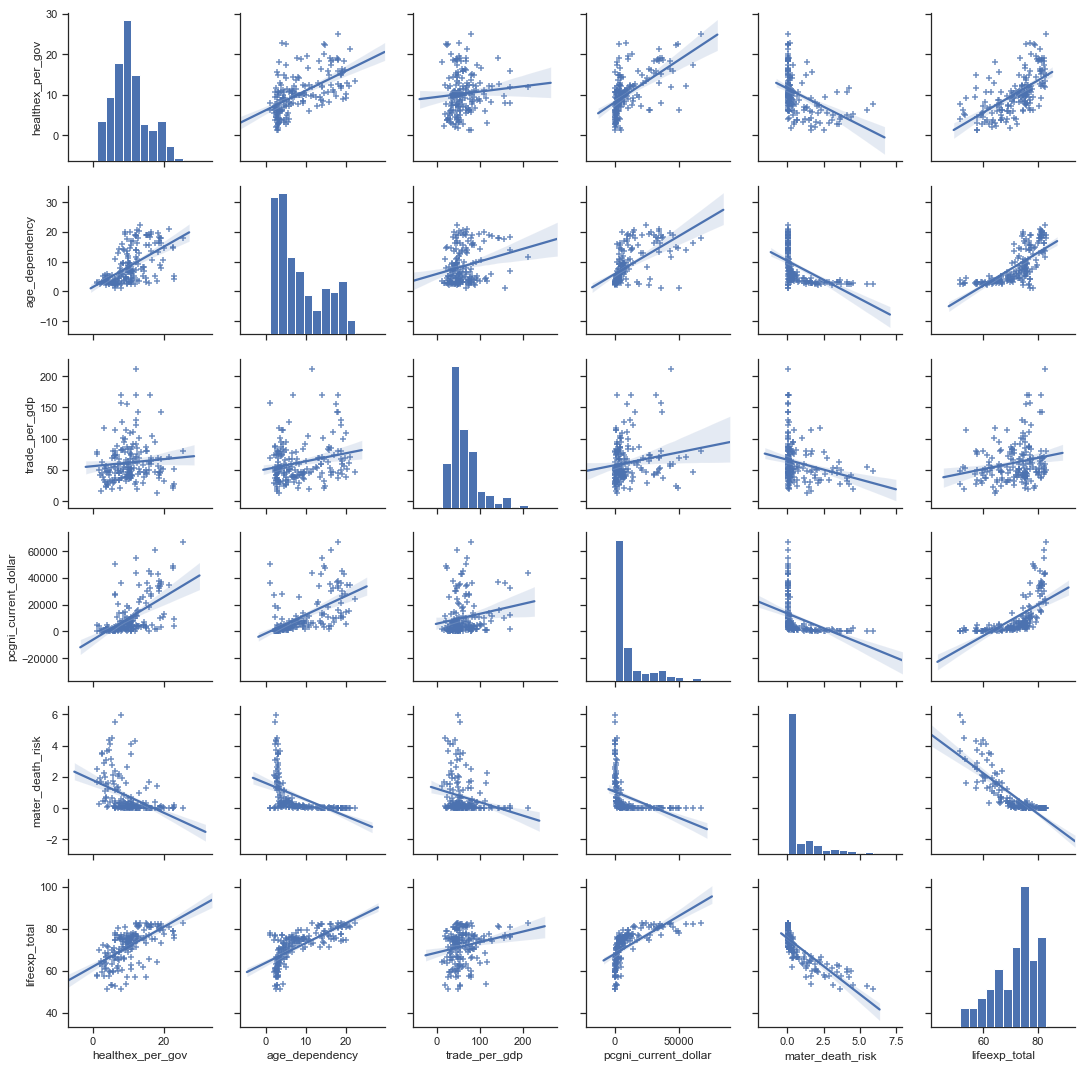

<Figure size 432x288 with 0 Axes>

In [68]:
# check correlation between variables by pariplot
sns.set(style="ticks", color_codes=True)
plt.figure(figsize=(8,6))
sns.pairplot(df, kind="reg", markers="+")
plt.show()
plt.savefig("Correlation between Variables")


According to the table and chart, it is easy to find that life expectancy has associations
with all the independent variables within different levels. The coefficient figures with
a star behind means this correlation of these paired variables has the statistically
significant meaning. The defaulted compared standard is p-value=0.05. The domain of
the coefficient index is [-1,1] from negative range to positive range. And there is a rule
of thumb like: 

                                                         Coefficient thumb rule
| The domain of coefficient | comments | 
| ------ | ------ |
| 0.8-1.0 | Obvious correlation | 
| 0.6-0.8 | Strong correlation |
| 0.4-0.6 | Moderate correlation
| 0.2-0.4 | Weak correlation |
| 0.0-0.2   | Extreme weak correlation |

### 5.2 Building one-dimensional linear regression model

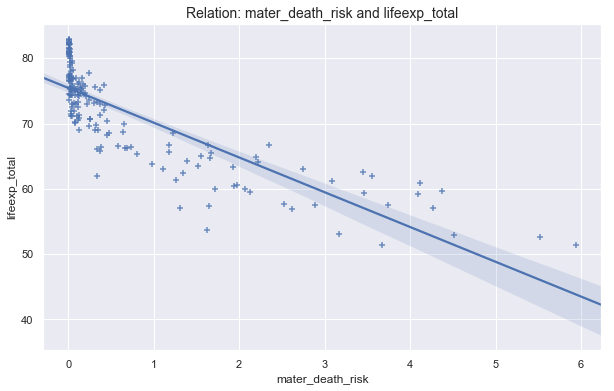

<Figure size 432x288 with 0 Axes>

In [65]:
#To show the relationship between *mater_death_risk* and *lifeexp_total*
plt.figure(figsize=(10, 6))
sns.set()
x = df["mater_death_risk"]
y = df["lifeexp_total"]
sns.regplot(x=x, y=y, marker="+")
plt.title("Relation: mater_death_risk and lifeexp_total", fontsize=14)
plt.show()
plt.savefig("Relation: mater_death_risk and lifeexp_total")

We can rougly exact the regression equation from the above figure: Life expectancy = -5.33 * mater_death_risk + 76.4

As the figure shows that mater_death_risk has the obviously correlation reaching 76.4 years old and it has a quite strongly negative effect on lifeexp_total. So, if we can narrow the negative factor, the lifeexp_total index will perform better.

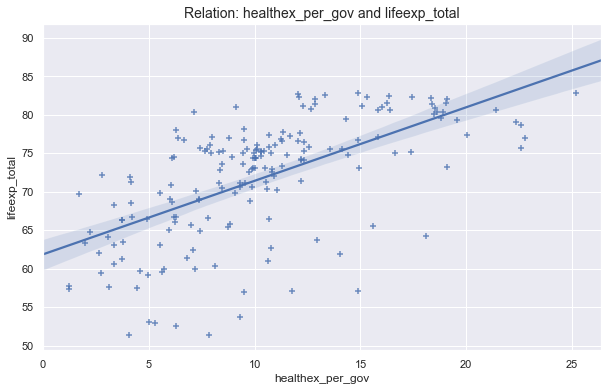

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lifeexp_total   R-squared:                       0.856
Model:                            OLS   Adj. R-squared:                  0.855
Method:                 Least Squares   F-statistic:                     1071.
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           1.09e-77
Time:                        19:23:22   Log-Likelihood:                -855.78
No. Observations:                 181   AIC:                             1714.
Df Residuals:                     180   BIC:                             1717.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
healthex_per_gov     5.8458      0.179     32.722      0.000       5.493       6.198
==============================================================================
Omnibus:                       14.986   Durbin-Watson:                   1.557
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.325
Skew:                          -0.722   Prob(JB):                     0.000285
Kurtosis:                       3.285   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Figure size 432x288 with 0 Axes>

In [66]:
#To show the relationship between *healthex_per_gov* and *lifeexp_total*
plt.figure(figsize=(10, 6))
sns.set()
x = df["healthex_per_gov"]
y = df["lifeexp_total"]
sns.regplot(x=x, y=y, marker="+")
plt.title("Relation: healthex_per_gov and lifeexp_total",fontsize=14)
plt.show()
plt.savefig("Relation: healthex_per_gov and lifeexp_total")

#Draw a summry of OLS regression
X_single = df["healthex_per_gov"]
Y_single = df["lifeexp_total"]
model = sm.OLS(endog=Y_single, exog=X_single).fit()
model.summary()

#### According to the graph and table, we can find that:    
(1). When we control the values of healthex_per_gov to be zero, people’s life expectancy is approximate 62.8 year.  
(2). When the level of healthex_per_gov increases one unit, people’s life expectancy will increase 5.8458 year.   
As for the t-value column, the t-values test the hypothesis that the coefficient is different from 0. The next column is two-tail P-values, this index tests the hypothesis that each coefficient is different from 0. To reject this, the p-value has to be lower than 0.05 and the confidence interval lower range (5.493) and upper range (6.198). Under this condition, healthex_per_gov index shows statistically significant in explaining this model, showing healthex_per_gov is importance to the model explanation.

### 5.3 Building multiple linear regression model

In [69]:
# build multiple regression model 
X_multi = df[["healthex_per_gov", "age_dependency", "trade_per_gdp", "pcgni_current_dollar", "mater_death_risk"]]
Y_single = df["lifeexp_total"]
X_multi = sm.add_constant(X_multi)
model = sm.OLS(endog=Y_single, exog=X_multi).fit()

In [70]:
# get the model summary
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          lifeexp_total   R-squared:                       0.855
Model:                            OLS   Adj. R-squared:                  0.851
Method:                 Least Squares   F-statistic:                     206.3
Date:                Wed, 13 Mar 2019   Prob (F-statistic):           2.18e-71
Time:                        19:37:19   Log-Likelihood:                -450.43
No. Observations:                 181   AIC:                             912.9
Df Residuals:                     175   BIC:                             932.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   69.3764      0.821     84.501      0.000      67.756      70.997
healthex_per_gov         0.1468      0.060      2.450      0.015       0.029       0.265
age_dependency           0.2985      0.054      5.568      0.000       0.193       0.404
trade_per_gdp           -0.0065      0.007     -0.912      0.363      -0.021       0.008
pcgni_current_dollar     0.0001   2.17e-05      6.107      0.000    8.96e-05       0.000
mater_death_risk        -3.7627      0.223    -16.860      0.000      -4.203      -3.322
==============================================================================
Omnibus:                       25.796   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.320
Skew:                          -0.814   Prob(JB):                     7.87e-09
Kurtosis:                       4.516   Cond. No.                     6.47e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.47e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### Model evaluation: 
we can see that the observed number in this model (final sample size) is181. The numbers of R-squared and adjusted R-squared are nearly the same at 85%, which shows the independent variables can explain the dependent variable with the rate of 85%. This level is quite high and it means the validity of this regression model is high.

In [71]:
# get specified data from the model
multi_parmas = dict(model.params)
for i, j in multi_parmas.items():
    multi_parmas[i] = round(j ,5)

In [72]:
# get the regression equation
print("Life expectancy = {0} * healthex_per_gov + {1} * age_dependency {2} * trade_per_gdp + {3} * pcgni_current_dollar {4} * mater_death_risk + {5}"
                                                            .format(
                                                                 multi_parmas["healthex_per_gov"],
                                                                 multi_parmas["age_dependency"],
                                                                 multi_parmas["trade_per_gdp"],
                                                                 multi_parmas["pcgni_current_dollar"],
                                                                 multi_parmas["mater_death_risk"],
                                                                 multi_parmas["const"]
                                                                )
                                                            )

Life expectancy = 0.14685 * healthex_per_gov + 0.29845 * age_dependency -0.00652 * trade_per_gdp + 0.00013 * pcgni_current_dollar -3.7627 * mater_death_risk + 69.37635


In [73]:
# get the multi params logic
model.params

const                   69.376353
healthex_per_gov         0.146849
age_dependency           0.298454
trade_per_gdp           -0.006521
pcgni_current_dollar     0.000132
mater_death_risk        -3.762697
dtype: float64

In [74]:
# we can try this in other method
from sklearn.linear_model import LinearRegression
x = df.drop("lifeexp_total", axis=1)
model = LinearRegression()
model.fit(x, df["lifeexp_total"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [75]:
# parmas　
model.coef_

array([ 1.46848638e-01,  2.98453998e-01, -6.52146918e-03,  1.32320022e-04,
       -3.76269670e+00])

In [77]:
# intercept
model.intercept_

69.37635327201218

#### We can get informations from the figures above that the multiple linear regression equation is:
*Life expectancy = 0.14685 * healthex_per_gov + 0.29845 * age_dependency -0.00652 * trade_per_gdp + 0.00013 * pcgni_current_dollar -3.7627 * mater_death_risk + 69.37635*

#### According to the regression equation, we can find that:
(1). When we control the values of all independent variables to be zero, people’s life expectancy is approximate 69.38 year.   
(2).When we control the values of age_dependency, trade_per_gdp, pcgni_current_dollar, mater_death_risk to be stable, if the amount of healthex_per_gov increases one unit, people’s life expectancy will increase 0.15 year.   
(3).When we control the values of healthex_per_gov, trade_per_gdp, pcgni_current_dollar, mater_death_risk to be stable, if the amount of age_dependency increases one unit, people’s life expectancy will increase 0.30 year. The age_dependency index has the strongest positive relationship with life expectancy.   
(4).When we control the values of healthex_per_gov, age_dependency, pcgni_current_dollar, mater_death_risk to be stable, if the amount of trade_per_gdp increases one unit, people’s life expectancy will decrease 0.006 year.   
(5). When we control the values of healthex_per_gov, age_dependency, trade_per_gdp, mater_death_risk to be stable, if the amount of pcgni_current_dollar increases one unit, people’s life expectancy will increase 0.00013 year.    
(6). When we control the values of healthex_per_gov, age_dependency, trade_per_gdp, pcgni_current_dollar to be stable, if the amount of mater_death_risk increases one unit, people’s life expectancy will decrease 3.76 year. The mater_death_risk index is a negative factor for life expectancy.


## 6 Conclusions and Discussion
### 6.1 Conclusions
The conclusion is that the five factors all have impact on life expectancy at different levels.
Although the sample size becomes smaller as more variables being added, the final multiple linear regression model has 181 countries to be the observed objects. Results shows among five selected factors, the effect from mater_death_risk is strongest but most negative to life expectancy.The factor of international trade over GDP has weak but negative effect on life expectancy. While other three indexes all have positive influence to life expectancy with differing levels. From the final multiple linear regression model, we can conclude that more effort should be spent on increasing the number of old age dependency, healthcare expenditure, GNI and reducing the risk of maternal death and international trade over GDP,the performance of life expectancy will be better.
### 6.2 Discussion
Life expectancy has become one of the most important topics worldwide nowadays. Factors affecting life expectancy has been complicated and diverse. Which triggers different scopes to analyze it. In this study, I just selected some indexes by personal experience and predecessors’ previous researches to build the model. Although this model perform well and overcome a chain of tests, it just provides an initial contribution in this issue, more investigation of the causes should be done in the future.  
In the end, I have to mention that the limitation of this research will go back to the data. This data file doesn’t include all the countries in the world and the time period is 2015. This is not strictly a best sample, with limited number of countries, old data information and missing data points. These factors may influence our modelling to some extent. If we can gain better research data, I am confident that the modelling results will be enhanced.